In [1]:
import matplotlib.pyplot as plt
from matplotlib import patches
import tensorflow as tf
import tensorflow_datasets as tfds

sys.path.append("../")
from models.yolo_face_detector import YoloFaceDetector

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
face_detector = YoloFaceDetector(model_path="../model_config/wider_face_yolo.h5",
                                 anchors_path="../model_config/wider_anchors.txt",
                                 classes_path="../model_config/wider_classes.txt")

Model loaded with weights from ../logs/models/wider_face_yolo.h5.


In [4]:
ds, ds_info = tfds.load('wider_face', split='train', with_info=True, shuffle_files=True, data_dir='../data')
assert isinstance(ds, tf.data.Dataset)
print(ds)

<_OptionsDataset shapes: {faces: {bbox: (None, 4), blur: (None,), expression: (None,), illumination: (None,), invalid: (None,), occlusion: (None,), pose: (None,)}, image: (None, None, 3), image/filename: ()}, types: {faces: {bbox: tf.float32, blur: tf.uint8, expression: tf.bool, illumination: tf.bool, invalid: tf.bool, occlusion: tf.uint8, pose: tf.bool}, image: tf.uint8, image/filename: tf.string}>


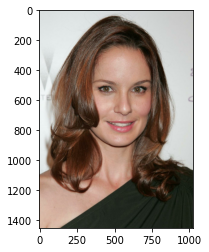

In [8]:
ds_np = list(tfds.as_numpy(ds.take(10)))
example = ds_np[0]
image = example['image']
plt.imshow(image)

In [11]:
faces = face_detector.detect(image)

[array([[[[ 0.03531132, -0.03355713,  0.00852614, ...,  0.05402945,
          -0.59199065,  0.02052011],
         [ 0.03985192, -0.03132883,  0.02008923, ...,  0.05394191,
          -0.5709155 ,  0.02629826],
         [ 0.03780976, -0.03195415,  0.0201664 , ...,  0.05281781,
          -0.5723178 ,  0.02688944],
         ...,
         [ 0.03748971, -0.03248884,  0.02018272, ...,  0.05279873,
          -0.57287735,  0.02629762],
         [ 0.03675472, -0.03378197,  0.02163291, ...,  0.05196173,
          -0.57499695,  0.02548112],
         [ 0.03906695, -0.03595717,  0.01971516, ...,  0.05429134,
          -0.6017809 ,  0.0277517 ]],

        [[ 0.03206502, -0.03628849,  0.00507564, ...,  0.04700622,
          -0.5522143 ,  0.02725446],
         [ 0.03523704, -0.03397012,  0.00891888, ...,  0.03986195,
          -0.52253026,  0.04086444],
         [ 0.03356107, -0.03575567,  0.00824872, ...,  0.0360796 ,
          -0.5247025 ,  0.04214617],
         ...,
         [ 0.03345276, -0.036401 

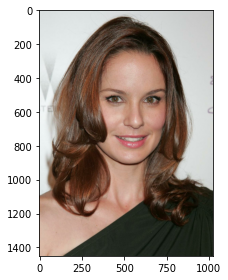

In [10]:
fig, ax = plt.subplots(1)

ax.imshow(image)

for face in faces:
  print('Face: ', face)
  rect = patches.Rectangle((face.x, face.y), face.width, face.height, edgecolor='r', facecolor='None')
  ax.add_patch(rect)

plt.tight_layout()
plt.draw()
plt.show()